In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [0]:
boston = load_boston()
X=boston.data
y=boston.target

In [0]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['VALUE'] = boston.target

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,VALUE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
from google.colab import files
files.upload()

Formulae to calculate W, b and derivatives.

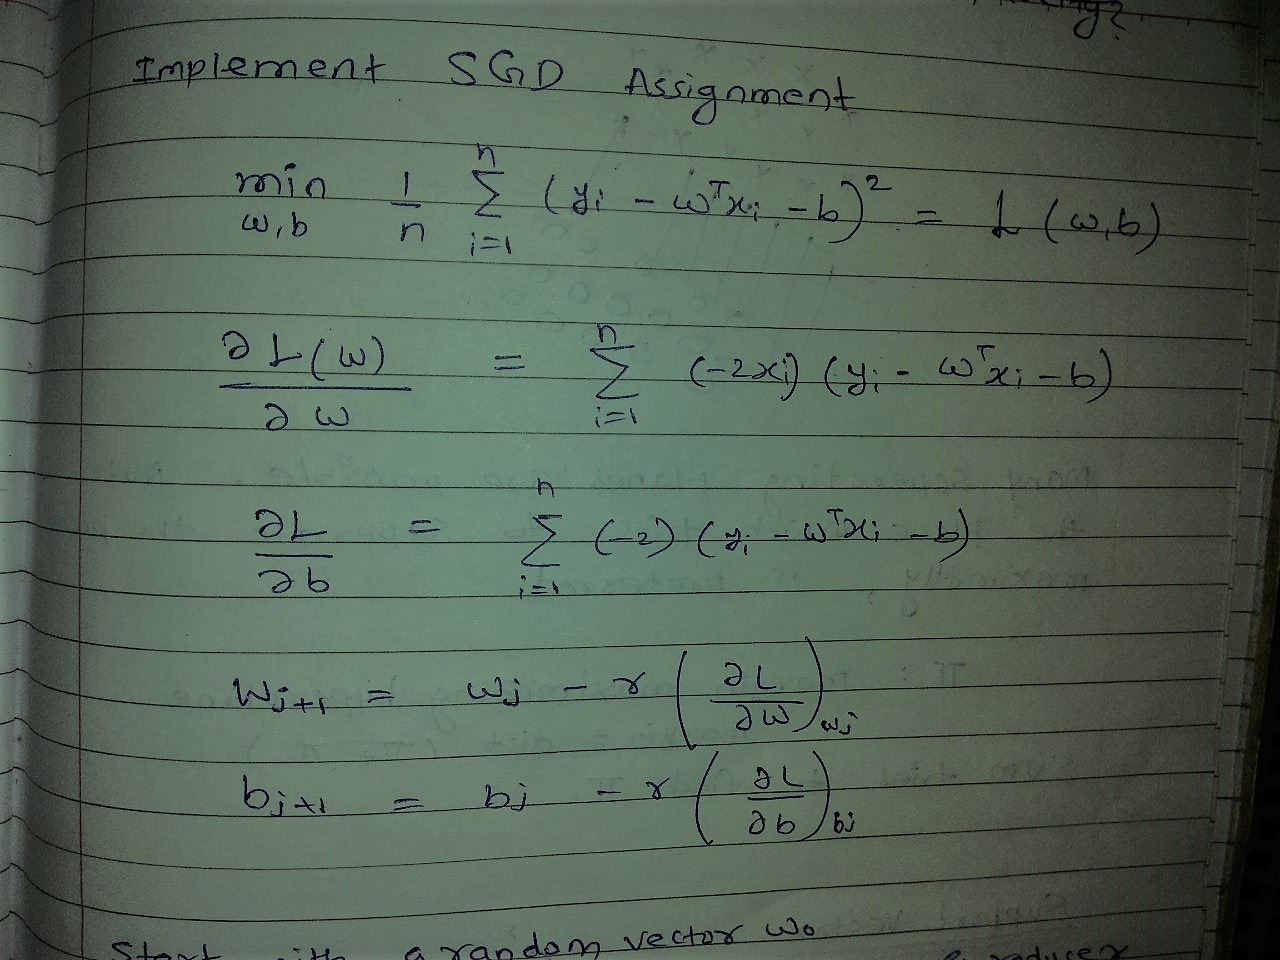

In [11]:
from IPython.display import Image
Image(filename='pic (1).jpg', width=900, height=600)

In [0]:
def derivative(X, y, w, b, wrt):
    
    # with respect to W
    if wrt == 'w':
        
        loss_sum = np.zeros(X[0].shape).reshape(-1,1)
        
        # For all the points in dataset X
        for i in range(X.shape[0]): 
            loss = (-2 * X[i].reshape(-1,1)) * (y[i] - np.matmul(w.T,X[i].reshape(-1,1)) - b)
            loss_sum += loss
    
    # with respect to b
    elif wrt == 'b':
        
        loss_sum = 0
        
        for i in range(X.shape[0]):
                        
            loss = (-2) * (y[i] - np.matmul(w.T, X[i]) - b)
            loss_sum += loss

    grad =  loss_sum / X.shape[0]
    
    return grad


def has_converged(w_old, w_new, threshold):
    
    dist = np.linalg.norm(w_new - w_old)
    
    # If the distance is more than a threshold, continue running
    if dist > threshold:
        
        print('distance: ', dist)
        
        return False
    
    # If the distance is less than the threshold, vector w has converged.
    else:
        
        #print('distance converged: ', dist)
            
        return True


                        # r is learning rate
def GradientDescent(X, y, r=0.000005):
        
    # random initial weight vector of size features x 1. One coeff with each dimension.
    w_old = np.random.rand(X.shape[1], 1)  
    # Initialize w_new with zeros
    w_new = np.zeros((X.shape[1], 1))
    # initialize random b
    b_old = float(np.random.rand()) 
        
    # Run until convergence
    while True:    
        w_new = w_old - (r * derivative(X, y, w_old, b_old, wrt='w'))
        b_new = b_old - (r * derivative(X, y, w_old, b_old, wrt='b'))
        
        if has_converged(w_old, w_new, threshold = 5):
            
            break
        
        w_old = w_new
        b_old = b_new
        
    return (w_new, b_new)
    
def StochasticGradientDescent():
    pass

Predict the target cost for X[0]

In [19]:
y=boston.target
X=boston.data

w_new, b_new = GradientDescent(X, y)


print('\nw_new is: {}'.format(w_new))
#print('\nShape of X[0] is: {}'.format(X[0].shape))
print('\nb_new is: {}'.format(b_new))


# Predicting the price of X[0] with formula: price = W.T * X + b
print('\nPrediction: {}'.format(np.matmul(w_new.T, X[0])+b_new))


w_new is: [[ 2.38379109e-01]
 [ 5.36049331e-01]
 [ 1.32796370e-01]
 [ 3.88122862e-01]
 [ 2.68842421e-01]
 [-1.31853958e-02]
 [ 4.73571630e-01]
 [ 4.26949745e-01]
 [ 2.72739477e-01]
 [-1.56833068e+00]
 [ 1.21855521e-01]
 [-1.17529942e+00]
 [ 6.01111068e-04]]

b_new is: [0.59712644]

Prediction: [-885.32677752]
